In [44]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd
import collections


from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from knn import KNNClassifier
from metrics import binary_classification_metrics, multiclass_accuracy

In [4]:
plt.rcParams["figure.figsize"] = 12, 9
sns.set_style("whitegrid")

SEED = 111
random.seed(SEED)
np.random.seed(SEED)

In [5]:
X, y = fetch_openml(name="Fashion-MNIST", return_X_y=True, as_frame=False)

In [6]:
idx_to_stay = np.random.choice(np.arange(X.shape[0]), replace=False, size=1000)
X = X[idx_to_stay]
y = y[idx_to_stay]

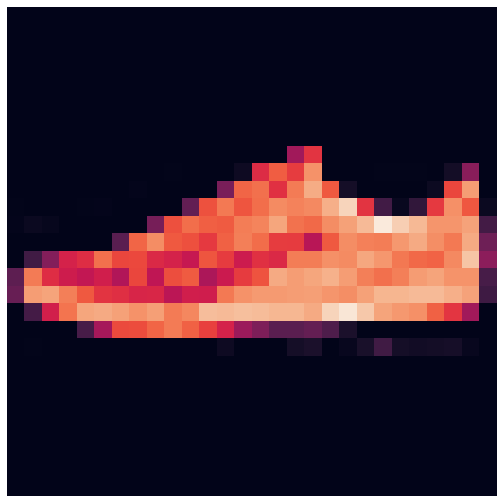

In [7]:
image = X[np.random.choice(np.arange(X.shape[0]))].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

# 1.1

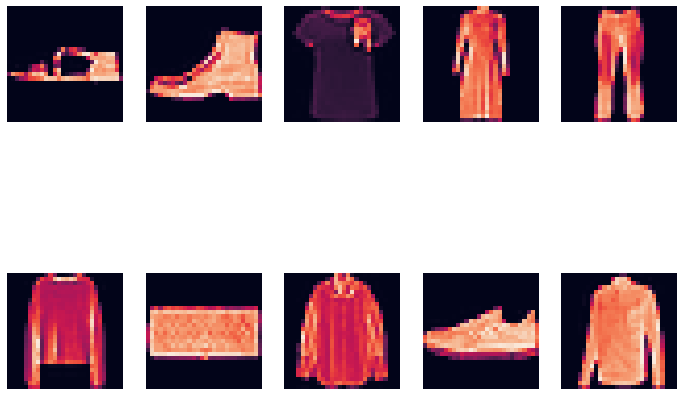

In [39]:
y_array = []
addit_ar = []
for i in range(1000):
    if y[i] not in addit_ar:
        if len(y_array) != 10:
            addit_ar.append(y[i])
            y_array.append(i)
for z in range(10):
    plt.subplot(2, 5, z+1)
    image = X[y_array[z]].reshape(28, 28, 1)
    plt.imshow(image)
    plt.axis("off");

# 1.2

In [18]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{'0': 93,
 '1': 102,
 '2': 95,
 '3': 121,
 '4': 96,
 '5': 98,
 '6': 101,
 '7': 79,
 '8': 109,
 '9': 106}

# 1.3

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 3)


# 1.4

In [55]:
y_train_bin = []
x_train_bin = []
for i in range(len(y_train)):
    if y_train[i]=='0' or y_train[i]=='1':
        y_train_bin.append(y_train[i])
        x_train_bin.append(X_train[i])
        
print(*y_train_bin)

y_test_bin = []
x_test_bin = []
for i in range(len(y_test)):
    if y_test[i]=='0' or y_test[i]=='1':
        y_test_bin.append(y_test[i])
        x_test_bin.append(X_test[i])
        
print('\n',*y_test_bin)


1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0

 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0


Пока было время на неделе, были дурацкие попытки реализовать функции, дальше пришлось похоронить надежды на выполнение домашнего задания, к сожалению :(

In [50]:
def compute_distances_two_loops(self, test_X):        
        
        test_len = len(test_X)
        train_len = len(self.train_X)
        dists = np.zeros((test_len, train_len))
        for i in range(test_len):
            for j in range(train_len):
                dists[i, j] = np.sum(np.abs(self.train_X[j,:] - test_X[i,:]))
        return dists

        pass


%timeit knn_classifier.compute_distances_two_loops(x_test_bin)

84.9 ns ± 1.74 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [53]:
def compute_distances_one_loop(self, X):
        
        test_len = len(test_X)
        train_len = len(self.train_X)
        dists = np.zeros((test_len, train_len))
        for i in range(test_len):
                dists[i] = np.sum(np.abs(self.train_X - test_X[i,:]))
        return dists

        pass





%timeit knn_classifier.compute_distances_one_loop(x_test_bin)

85.4 ns ± 1.24 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
